In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r"dados\\cinemaTicket_Ref.csv")
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [38]:
# Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma? 

# Mostrar o tipo dos dados de cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [39]:
# Pergunta: Há valores ausentes no conjunto de dados? Explique-os

# Mostrando a quantidade de NaN (valores ausentes) em cada coluna dataset
df.isna().sum()



film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [40]:
# Existem valores nulos (ausentes) em duas colunas que são correlacionadas:
# Capacidade e porcentagem de ocupação. É provável que a coluna capacidade esteja com valor ausente e cause a ausência no valor da porcentagem 
# (Impossibilidade de dividir por zero)

In [41]:
#Checando se o que ocorreu foi isso mesmo

qtde_valores_validos_capacity_df_nan = len(df[df.isna().any(axis=1)]['capacity'].value_counts())
print(f'A quantidade de valores válidos na coluna Capacity das linhas que tem valores ausentes é de: {qtde_valores_validos_capacity_df_nan}')

# Ou seja, a teoria está correta. A falta de valores em capacity está gerando valores nulos nas duas colunas

A quantidade de valores válidos na coluna Capacity das linhas que tem valores ausentes é de: 0


In [42]:
quantidade_linhas_nulo = df.isna().any(axis=1).sum()


print(f'A porcentagem de linhas de dados nulas dento do df é de {(quantidade_linhas_nulo / len(df))*100:.2f} %')

A porcentagem de linhas de dados nulas dento do df é de 0.09 %


In [43]:
# Pela quantidade irrisória de linhas de dados com valores nulos (0,09% do dataset), é comum simplesmente retirá-las do dataset 
# para trabalhar com as outras linhas com valores válidos. 
# Uma outra forma de trabalhar com esses dados seria buscar se existem informações sobre a capacidade desse cinema no dataset e preencher
# as linhas com capacidade nula com a capacidade correta ou esperada (média ou mediana dos dados históricos)

In [44]:
# # Essa parte aqui é se a gnt quiser desenvolver o pensamento de preenchimento dos NaNs que pus acima
# # (Não finalizei, é só o começo)

# df_nan = df[df.isna().any(axis=1)]

# # Separando quais cinemas estão sem dados de capacidade
# cinemas_sem_capacidade = df_nan['cinema_code'].unique().tolist()

# df_sem_nan = df.dropna()
# df_sem_nan.isna().sum()

# df_sem_nan[df_sem_nan['cinema_code'].isin(cinemas_sem_capacidade)].sort_values(by='cinema_code', ascending=True).head(50)

# # faz um groupby e calcula média ou mediana e depois aplica no df_nan

In [45]:
# Dropar os valores NaN para análises

df.dropna(inplace=True)


In [46]:
colunas_dataset = df.columns.tolist()
colunas_dataset

['film_code',
 'cinema_code',
 'total_sales',
 'tickets_sold',
 'tickets_out',
 'show_time',
 'occu_perc',
 'ticket_price',
 'ticket_use',
 'capacity',
 'date',
 'month',
 'quarter',
 'day']

In [47]:
# Pergunta: Qual é a estatística descritiva básica para as variáveis numéricas, como
# média, mediana, mínimo, máximo e desvio padrão?

# As análises vão depender do que você vai entender que é o objeto da análise
# Se você considerar que o filme especificamente é o objeto da análise, terá que fazer um groupby nele, o mesmo para cinema_code
# Para analisar quais salas de cinema tem melhor perfomance em venda, diferença de preços. 
# Pode fazer o groupby por data tbm.
# Acredito que por isso ele fale em storytelling com os dados, será uma escolha nossa.


variaveis = ['film_code',
 'cinema_code',
 'total_sales',
 'tickets_sold',
 'tickets_out',
 'show_time',
 'occu_perc',
 'ticket_price',
 'ticket_use',
 'capacity',
 'date',
 'month',
 'quarter',
 'day']

In [48]:
print(f"""
    Quantidade de filmes únicos:{df['film_code'].nunique()}
    Quantidade de cinemas únicos: {df['cinema_code'].nunique()}
    Quantidade de datas únicas: {df['date'].nunique()}
""")


    Quantidade de filmes únicos:48
    Quantidade de cinemas únicos: 244
    Quantidade de datas únicas: 234



In [49]:
# Se quiser ignorar essa parte, dá para fazer uma análise no aspecto geral, sobre capacidade e preço de cada sessão 
# porém essa análise vai permitir duas ou mais análises para a mesma sala ou mesmo filme no mesmo dia.

In [50]:
# Criando uma função para ter os dados descritivos de cada coluna
# Retirei as colunas film_code, cinema_code e date
colunas_a_analisar = [
 'total_sales',
 'tickets_sold',
 'tickets_out',
 'show_time',
 'occu_perc',
 'ticket_price',
 'ticket_use',
 'capacity',
 'month',
 'quarter',
 'day']
 

def estatistica_descritiva_por_coluna(coluna):
    print(f"Estatística descritiva da coluna: {coluna}")

    df_estatistica_descritiva = df[coluna].describe()
    print(df_estatistica_descritiva)
    print()
    print("*=*"*10)
    print()


In [51]:
for coluna in colunas_a_analisar:
    estatistica_descritiva_por_coluna(coluna)

Estatística descritiva da coluna: total_sales
count    1.423990e+05
mean     1.234773e+07
std      3.063471e+07
min      2.000000e+04
25%      1.280000e+06
50%      3.720000e+06
75%      1.112000e+07
max      1.262820e+09
Name: total_sales, dtype: float64

*=**=**=**=**=**=**=**=**=**=*

Estatística descritiva da coluna: tickets_sold
count    142399.000000
mean        140.177080
std         279.709174
min           1.000000
25%          18.000000
50%          50.000000
75%         143.000000
max        8499.000000
Name: tickets_sold, dtype: float64

*=**=**=**=**=**=**=**=**=**=*

Estatística descritiva da coluna: tickets_out
count    142399.000000
mean          0.237389
std           2.924231
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         311.000000
Name: tickets_out, dtype: float64

*=**=**=**=**=**=**=**=**=**=*

Estatística descritiva da coluna: show_time
count    142399.000000
mean          3.933883
std           3.056853
mi

In [52]:
type(df['date'].iloc[1])

str

In [53]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [54]:
len(df)

142399

In [55]:
df_agrupado = df.groupby(by=['film_code', 'cinema_code', 'date']).sum().reset_index()

df_agrupado

,film_code,cinema_code,date,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,1471,56,2018-05-02,1600000,22,0,2,3.19,72727.272727,22,689.655172,5,2,2
1,1471,56,2018-05-03,2000000,25,0,3,3.26,80000.000000,25,766.871166,5,2,3
2,1471,56,2018-05-04,2440000,33,0,3,4.30,73939.393939,33,767.441860,5,2,4
3,1471,56,2018-05-05,880000,11,0,2,1.59,80000.000000,11,691.823899,5,2,5
4,1471,56,2018-05-06,1000000,14,0,2,2.03,71428.571429,14,689.655172,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142290,1589,526,2018-10-28,600000,10,0,1,3.62,60000.000000,10,276.243094,10,4,28
142291,1589,553,2018-10-31,660000,11,0,1,11.00,60000.000000,11,100.000000,10,4,31
142292,1589,553,2018-11-01,600000,10,0,1,10.00,60000.000000,10,100.000000,11,4,1
142293,1589,553,2018-11-02,360000,6,0,1,6.00,60000.000000,6,100.000000,11,4,2


In [56]:
len(df_agrupado)

142295

In [ ]:
# Agrupa por film_code e date, somando total_sales
analise_df = df.groupby(['film_code', 'date'])['total_sales'].sum().reset_index()

# Itera sobre cada film_code e gera um gráfico de barras individual
for film_code, group_data in analise_df.groupby('film_code'):
    plt.figure(figsize=(5, 4))  # Cria uma nova figura para cada gráfico
    plt.bar(group_data['date'], group_data['total_sales'], color='blue', alpha=0.7)
    
    # Adiciona rótulos e título para cada filme
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales Over Time for Film {film_code}')
    
    # Rotaciona os rótulos do eixo X para facilitar a leitura das datas
    plt.xticks(rotation=45)
    
    plt.show()

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 10)



In [68]:
variaveis_numericas = [
 'total_sales',
 'tickets_sold',
 'tickets_out',
 'show_time',
 'occu_perc',
 'ticket_price',
 'ticket_use',
 'capacity']

In [71]:
def fazer_graficos_histogramas(coluna, dataframe):
    print(f'\nPara a coluna {coluna}: \n')
    

    # Gráfico combinado de histograma e boxplot
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2, 
        sharex=True, 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(12, 8)
    )
    
    sns.boxplot(
        data=dataframe, x=coluna, ax=ax_box, showmeans=True, color="lightblue"
    )
    ax_box.set_title(f"Boxplot de {coluna}")

    # Histograma com barras empilhadas para 'saiu_banco'
    sns.histplot(
        data=dataframe,
        x=coluna,
        multiple='stack',
        ax=ax_hist
    )
    ax_hist.set_title(f"Histograma de {coluna}")
    ax_hist.set_xlabel(f"{coluna}")
    
    # Adiciona linhas de média e mediana no histograma
    media = dataframe[coluna].mean()
    mediana = dataframe[coluna].median()
    
    ax_hist.axvline(media, color="green", linestyle="--", linewidth=2)
    ax_hist.axvline(mediana, color="black", linestyle="-", linewidth=2)

    # Anotações para média e mediana
    ax_hist.annotate(f'Média: {media:.2f}', 
                        xy=(media, ax_hist.get_ylim()[1] * 0.85), 
                        xytext=(media + 1, ax_hist.get_ylim()[1] * 0.9),
                        textcoords='data',
                        color='green', fontsize=12,
                        bbox=dict(facecolor='white', alpha=0.6),
                        arrowprops=dict(facecolor='green', arrowstyle='->'))

    ax_hist.annotate(f'Mediana: {mediana:.2f}', 
                        xy=(mediana, ax_hist.get_ylim()[1] * 0.6), 
                        xytext=(mediana - 2, ax_hist.get_ylim()[1] * 0.65),
                        textcoords='data',
                        color='black', fontsize=12,
                        bbox=dict(facecolor='white', alpha=0.6),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.tight_layout()
    plt.show()


Dados para coluna total_sales

count                48.00
mean     36,631,346,462.15
std      65,105,194,855.06
min          16,490,000.00
25%       2,066,502,499.25
50%      13,637,679,491.00
75%      30,966,218,464.25
max     372,730,716,637.00
Name: total_sales, dtype: float64


Para a coluna total_sales: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


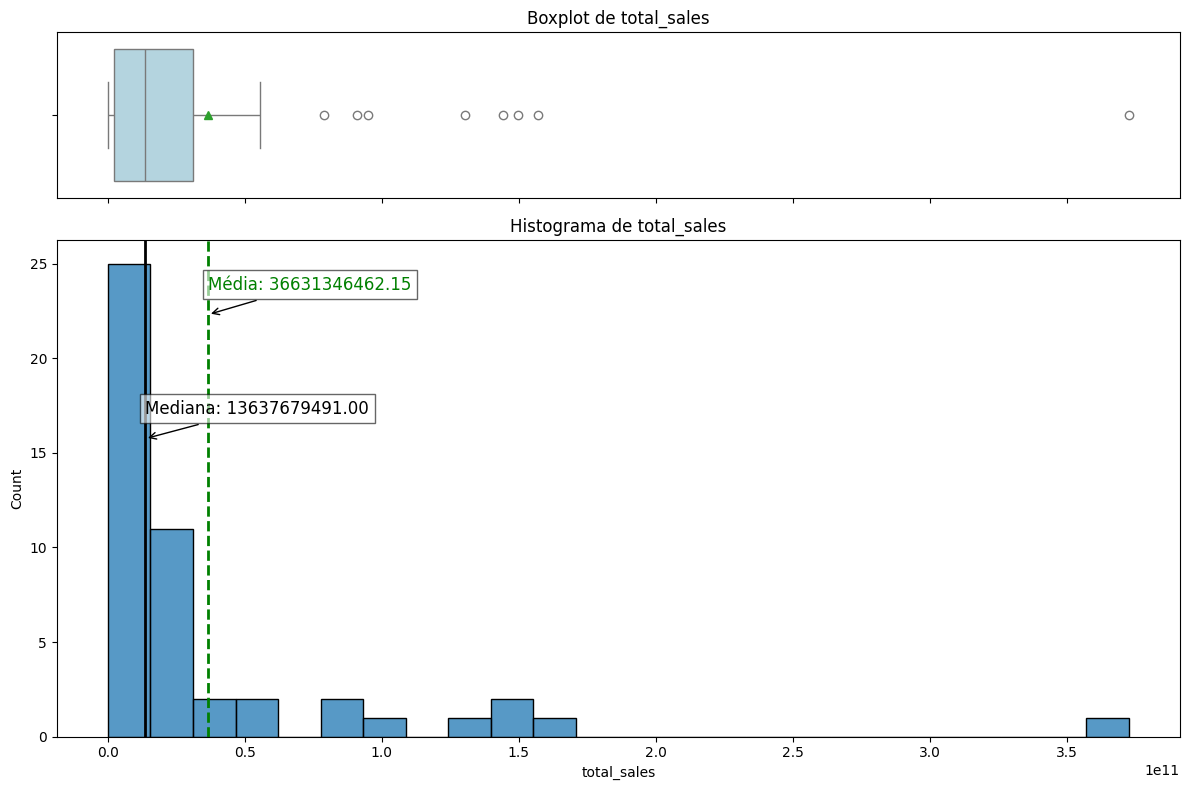


Dados para coluna tickets_sold

count          48.00
mean      415,855.75
std       735,607.31
min           176.00
25%        21,576.00
50%       138,874.50
75%       360,450.50
max     4,129,443.00
Name: tickets_sold, dtype: float64


Para a coluna tickets_sold: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


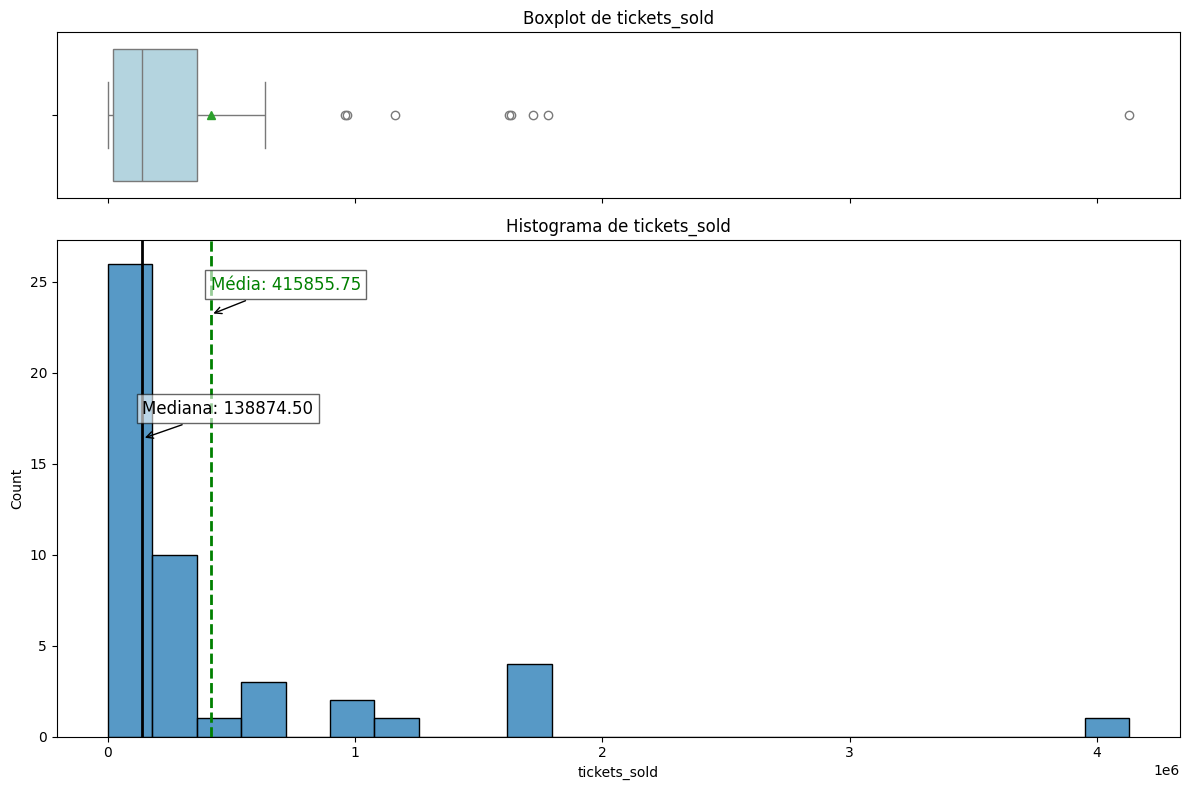


Dados para coluna tickets_out

count      48.00
mean      704.25
std     1,171.08
min         0.00
25%        38.00
50%       312.00
75%       671.25
max     6,132.00
Name: tickets_out, dtype: float64


Para a coluna tickets_out: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


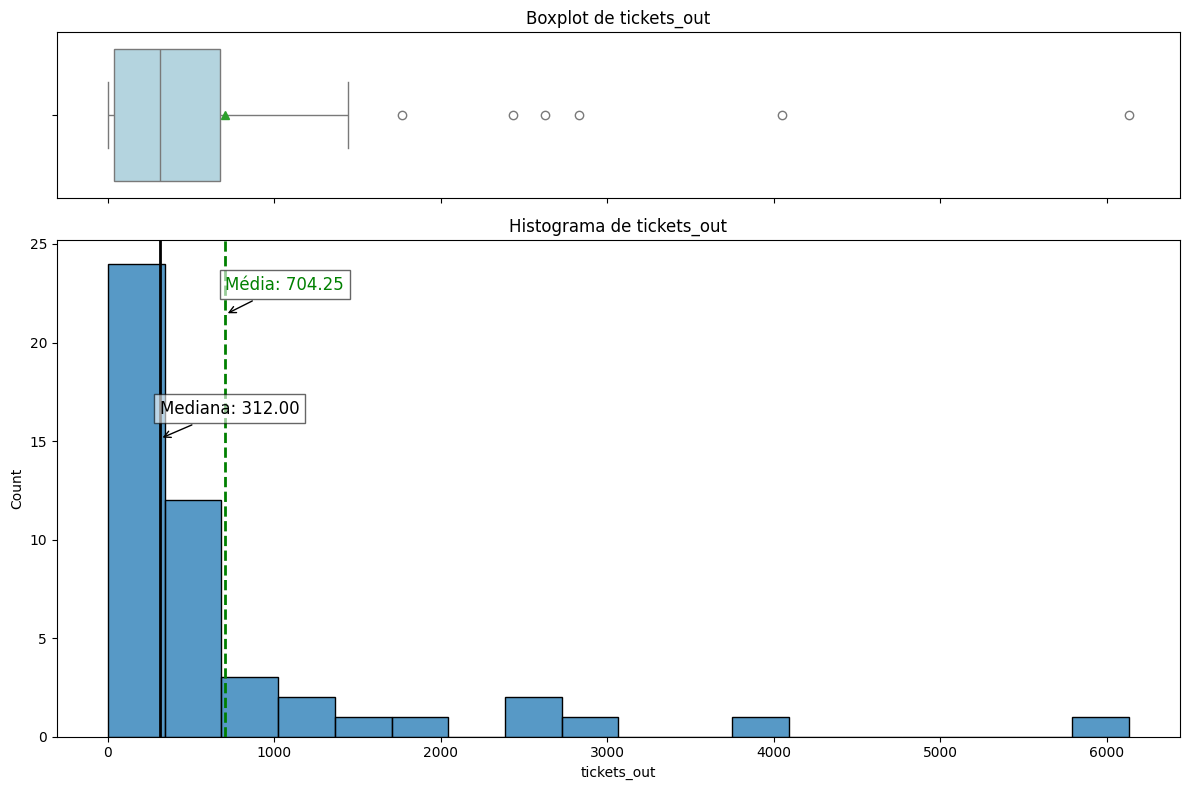


Dados para coluna show_time

count       48.00
mean    11,670.44
std     13,415.50
min         91.00
25%      1,938.00
50%      6,936.00
75%     15,285.25
max     66,136.00
Name: show_time, dtype: float64


Para a coluna show_time: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


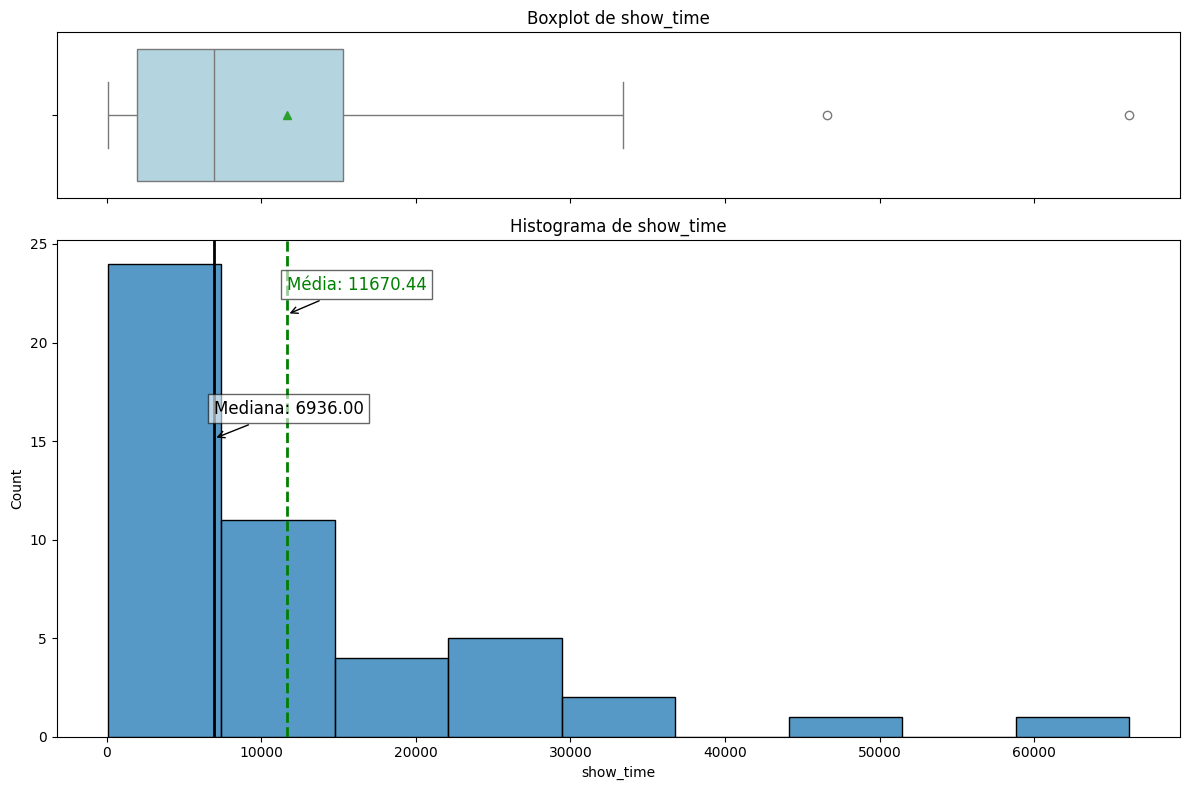


Dados para coluna occu_perc

count        48.00
mean     59,232.01
std      73,485.28
min         213.50
25%       8,210.06
50%      32,378.35
75%      66,010.90
max     294,599.20
Name: occu_perc, dtype: float64


Para a coluna occu_perc: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


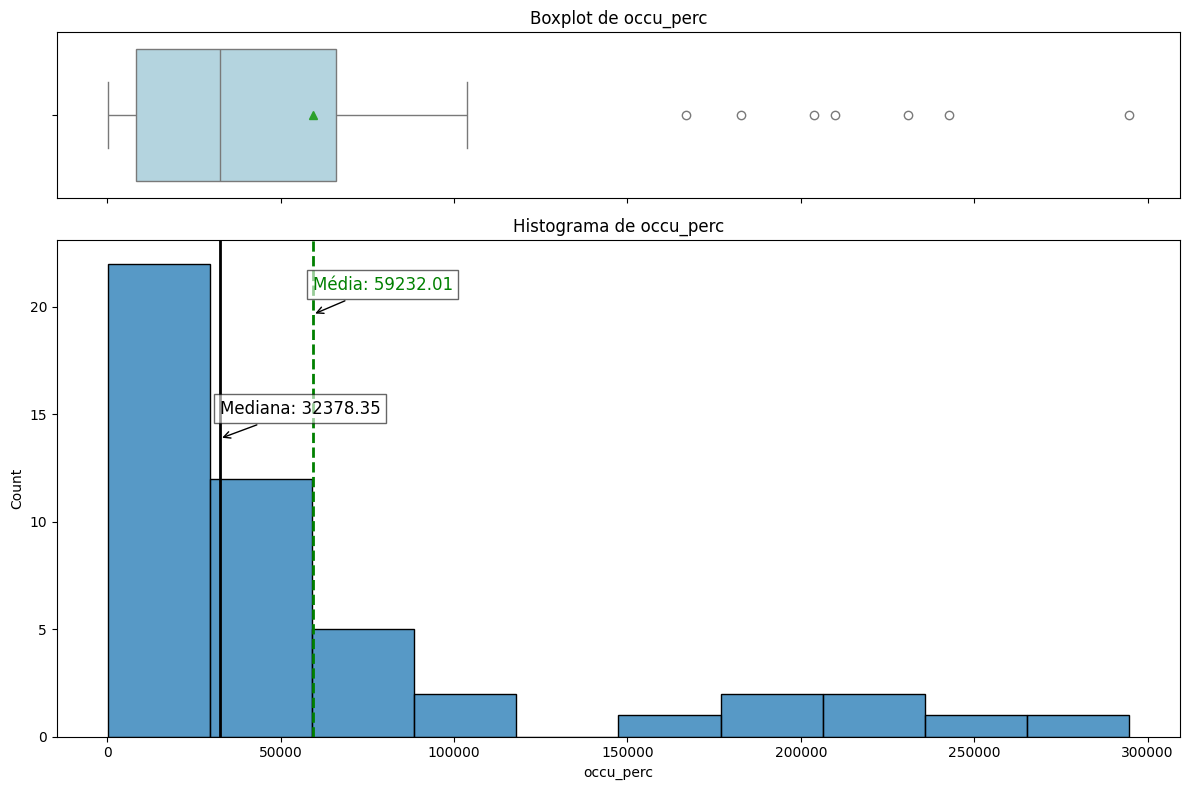


Dados para coluna ticket_price

count            48.00
mean    241,020,499.78
std     226,829,348.95
min       4,011,500.00
25%      58,405,691.32
50%     172,000,231.67
75%     335,833,953.58
max     940,301,000.47
Name: ticket_price, dtype: float64


Para a coluna ticket_price: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


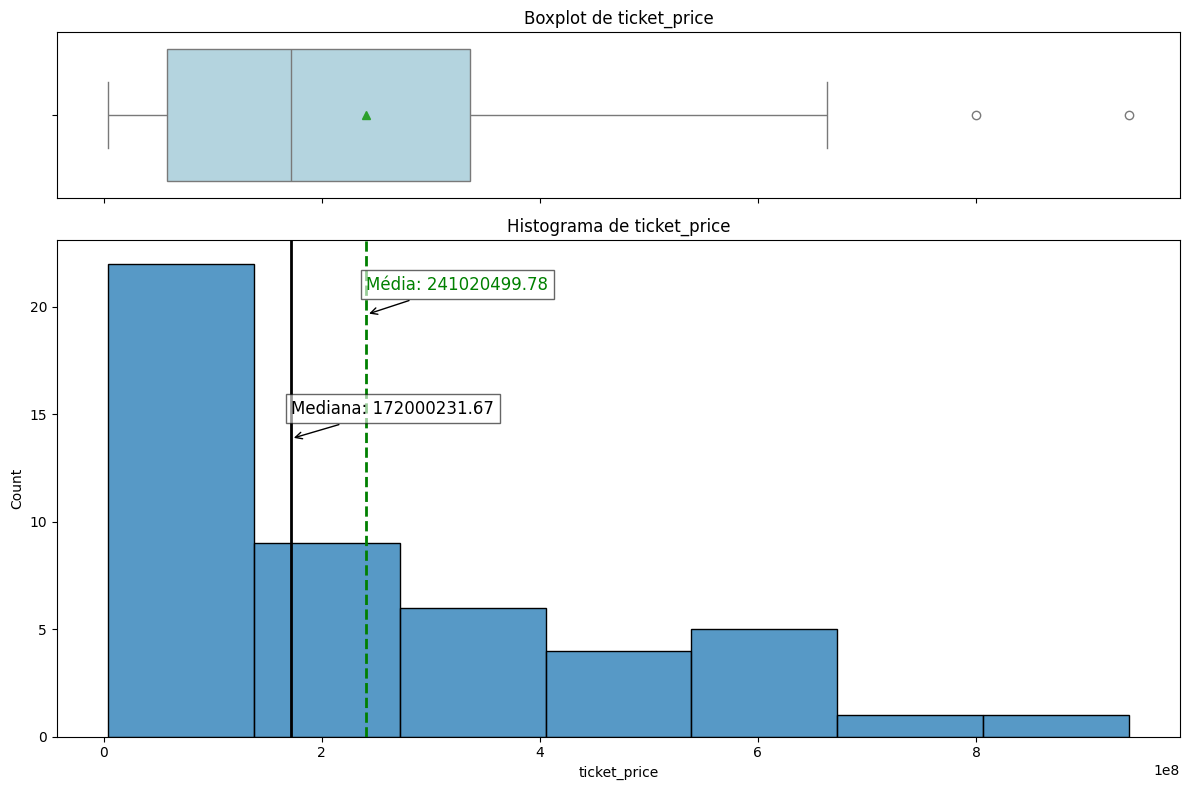


Dados para coluna ticket_use

count          48.00
mean      415,151.50
std       734,485.55
min           176.00
25%        21,555.00
50%       138,618.50
75%       359,854.50
max     4,123,311.00
Name: ticket_use, dtype: float64


Para a coluna ticket_use: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


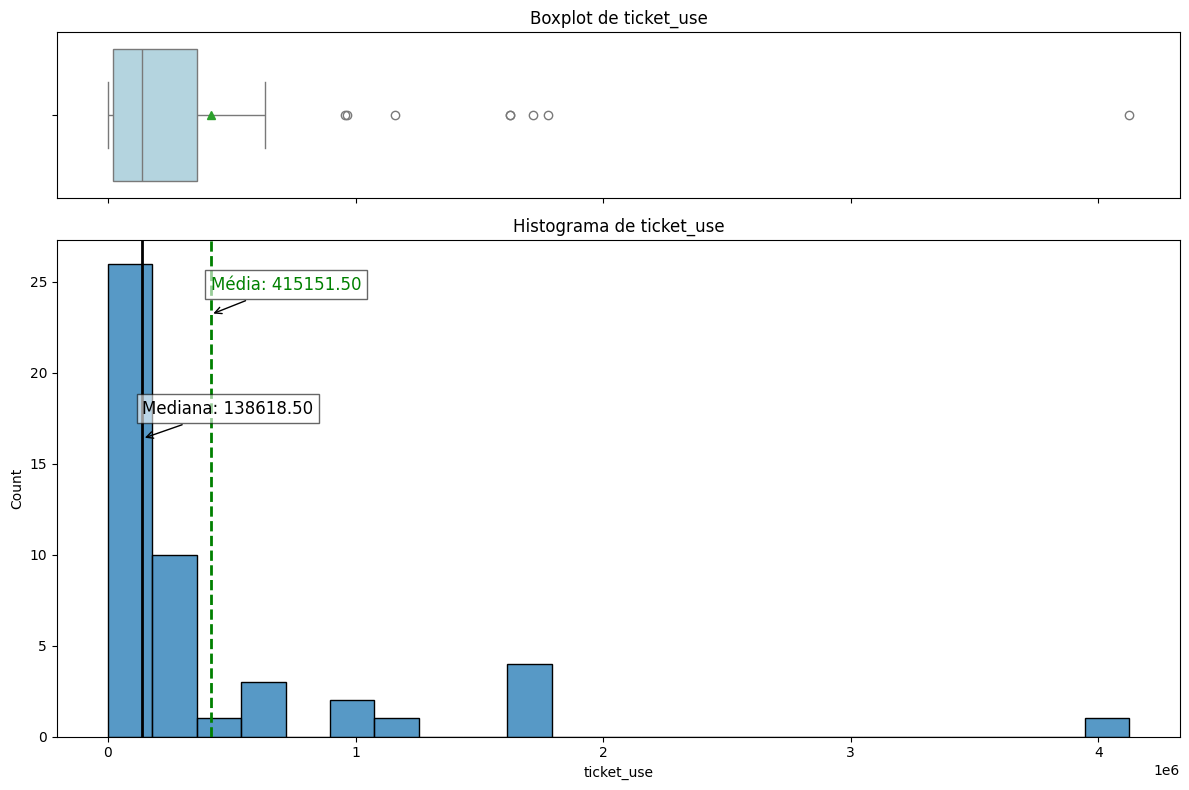


Dados para coluna capacity

count           48.00
mean     2,535,662.22
std      3,374,129.61
min          5,134.91
25%        333,275.31
50%      1,187,640.98
75%      3,113,860.01
max     17,598,974.81
Name: capacity, dtype: float64


Para a coluna capacity: 



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


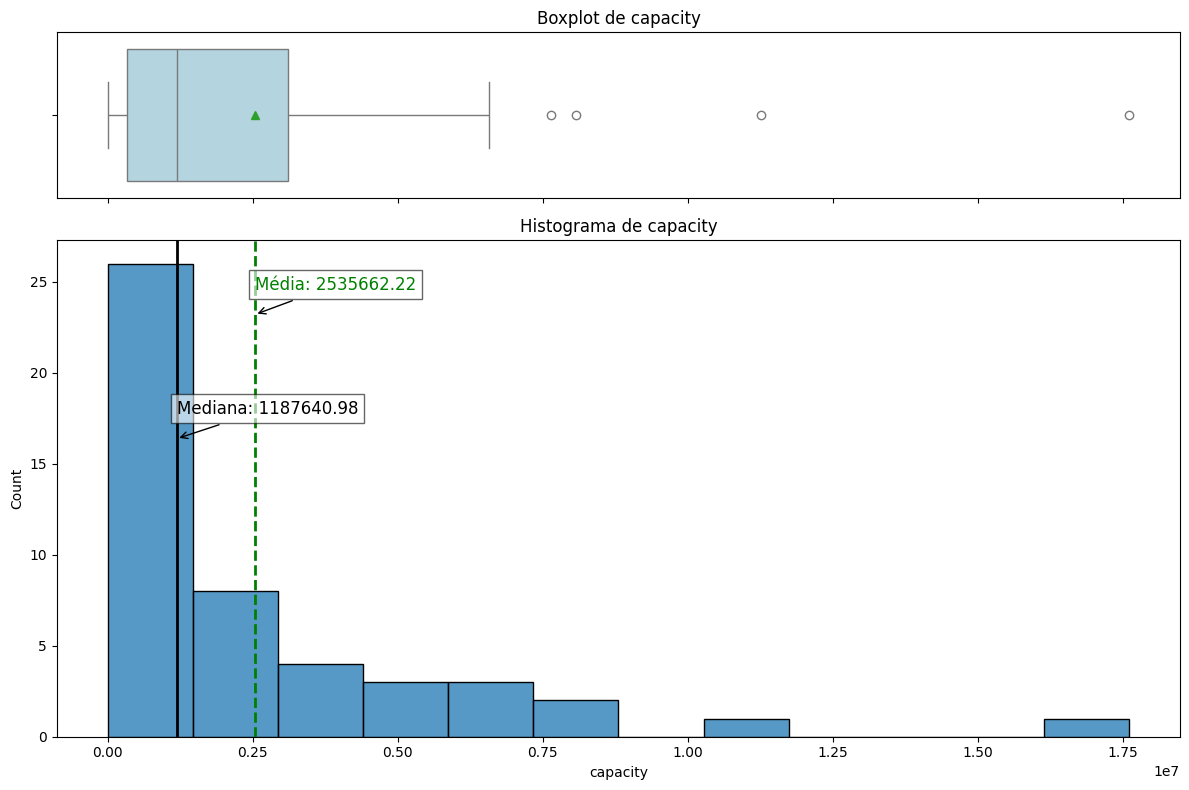

In [77]:
# Análise de estatística descritiva de total de vendas por cada filme

for coluna in variaveis_numericas:

    

    analise_df = df.drop(columns='date', axis=1).groupby(['film_code']).sum().reset_index()

    print(f"\nDados para coluna {coluna}\n")
    print(analise_df[coluna].describe())
    print()
    fazer_graficos_histogramas(coluna, analise_df)